In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf #matplotlibfinance

In [2]:
# plt.style.use(['science'])

In [3]:
df_cognizant = pd.read_csv('Datasets/Cognizant share prices 2019_2021.csv',parse_dates = ['Date'],infer_datetime_format=True,index_col='Date')
df_hcl = pd.read_csv('Datasets/HCL Technologies share prices 2019_2021.csv',parse_dates = ['Date'],infer_datetime_format=True,index_col='Date')
df_hdfc = pd.read_csv('Datasets/HDFC Bank Share Prices 2019_2021.csv',parse_dates = ['Date'],infer_datetime_format=True,index_col='Date')
df_icici = pd.read_csv('Datasets/ICICI Bank Share Prices 2019_2021.csv',parse_dates = ['Date'],infer_datetime_format=True,index_col='Date')
df_infosys = pd.read_csv('Datasets/Infosys Share Prices 2019_2021.csv',parse_dates = ['Date'],infer_datetime_format=True,index_col='Date')
df_sbi = pd.read_csv('Datasets/SBI Share Prices 2019_2021.csv',parse_dates = ['Date'],infer_datetime_format=True,index_col='Date')
df_inr = pd.read_csv('Datasets/USD-INR Exchange rate 2019_2021.csv',parse_dates = ['Date'],infer_datetime_format=True,index_col='Date')

## Remove null rows

In [4]:
df_cognizant.dropna(inplace = True)
df_hcl.dropna(inplace=True)
df_hdfc.dropna(inplace =True)
df_icici.dropna(inplace=True)
df_infosys.dropna(inplace=True)
df_sbi.dropna(inplace=True)
df_inr.dropna(inplace=True)

## Check for null values

In [5]:
# print(df_cognizant.isnull().sum())
# print(df_cognizant.dtypes)
# print(df_hcl.isnull().sum())
# print(df_hcl.dtypes)
# print(df_hdfc.isnull().sum())
# print(df_hdfc.dtypes)
# print(df_icici.isnull().sum())
# print(df_icici.dtypes)
# print(df_infosys.isnull().sum())
# print(df_infosys.dtypes)
# print(df_sbi.isnull().sum())
# print(df_sbi.dtypes)
# print(df_inr.isnull().sum())
# print(df_inr.dtypes)

## Stock Price

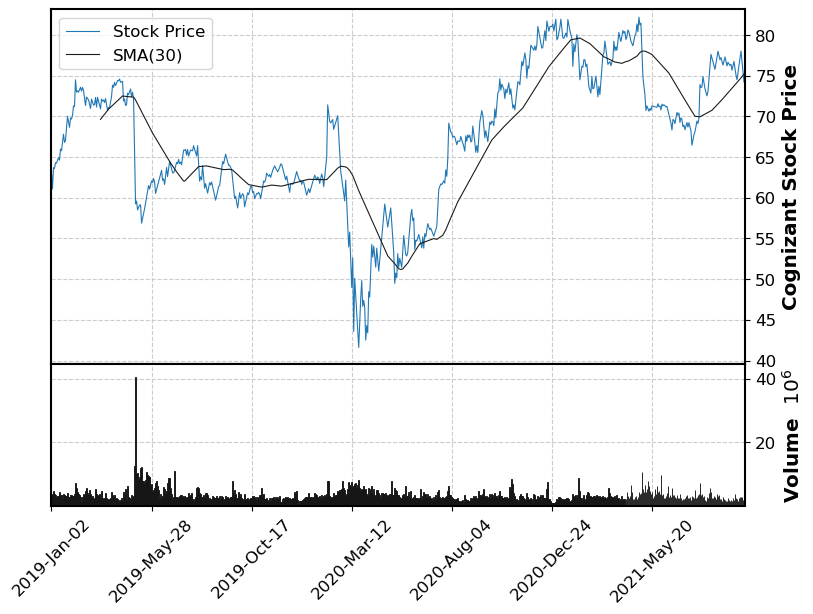

In [6]:
fig,ax = mpf.plot(df_cognizant ,volume=True,type='line',mav=50,tight_layout=True,style='classic',returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
ax[0].set_ylabel('Cognizant Stock Price')
# fig.savefig('Cognizant_linechart.png')
plt.show()

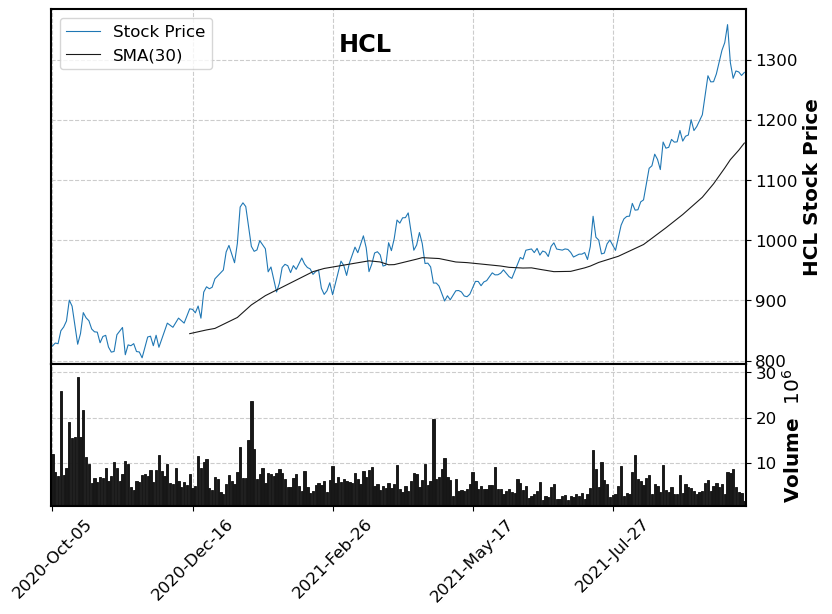

In [7]:
fig,ax =mpf.plot(df_hcl ,volume=True,type='line',mav=50,tight_layout=True,style='classic',title='HCL',returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
ax[0].set_ylabel('HCL Stock Price')
plt.show()

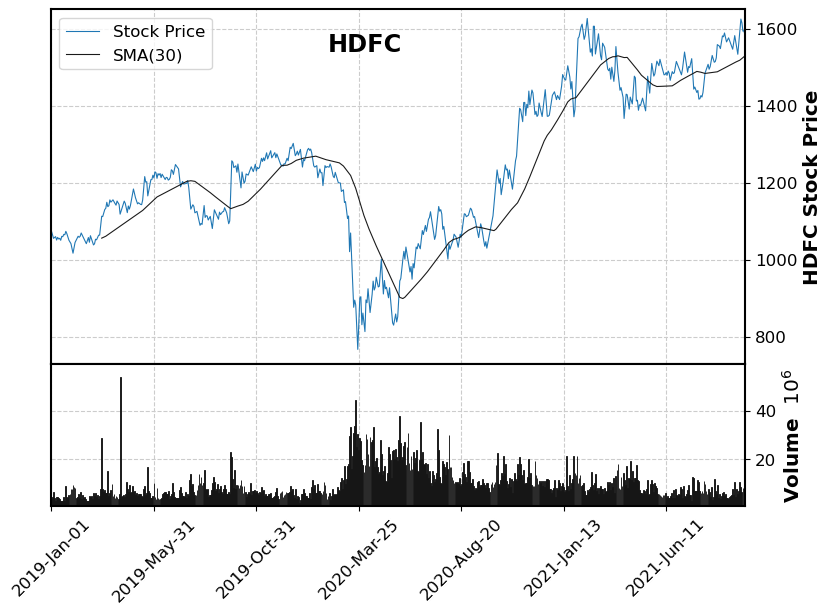

In [8]:
fig,ax =mpf.plot(df_hdfc ,volume=True,type='line',mav=50,tight_layout=True,style='classic',title='HDFC',returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
ax[0].set_ylabel('HDFC Stock Price')
plt.show()

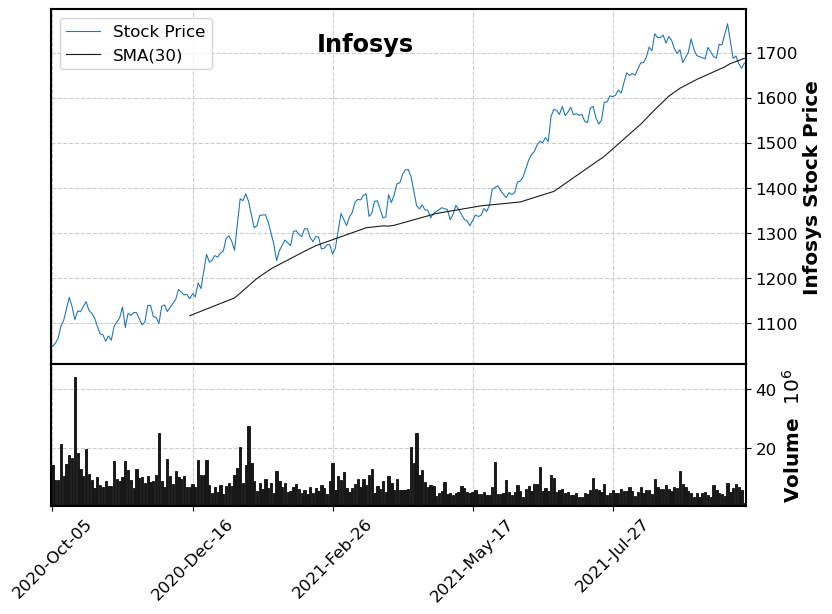

In [9]:
fig,ax =mpf.plot(df_infosys ,volume=True,type='line',mav=50,tight_layout=True,style='classic',title='Infosys',returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
ax[0].set_ylabel('Infosys Stock Price')
plt.show()

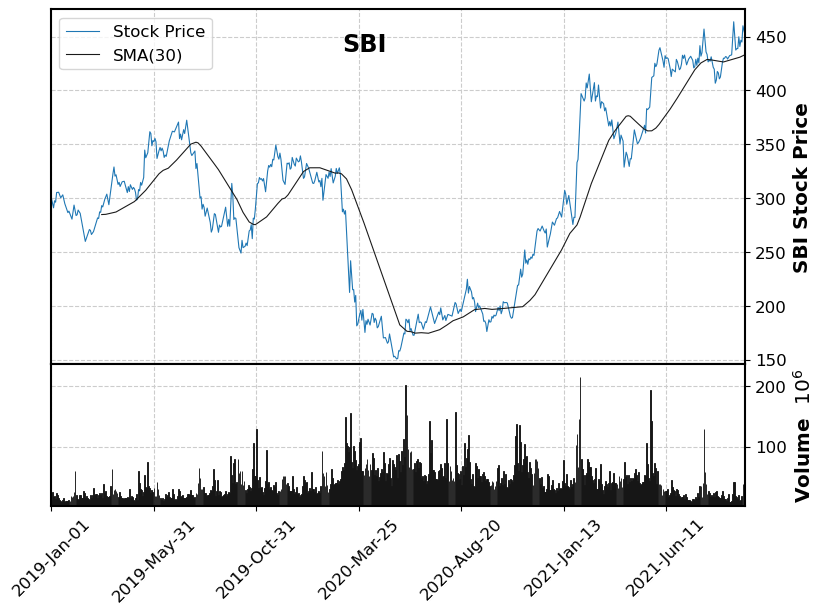

In [10]:
fig,ax =mpf.plot(df_sbi ,volume=True,type='line',mav=50,tight_layout=True,style='classic',title='SBI',returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
ax[0].set_ylabel('SBI Stock Price')
plt.show()

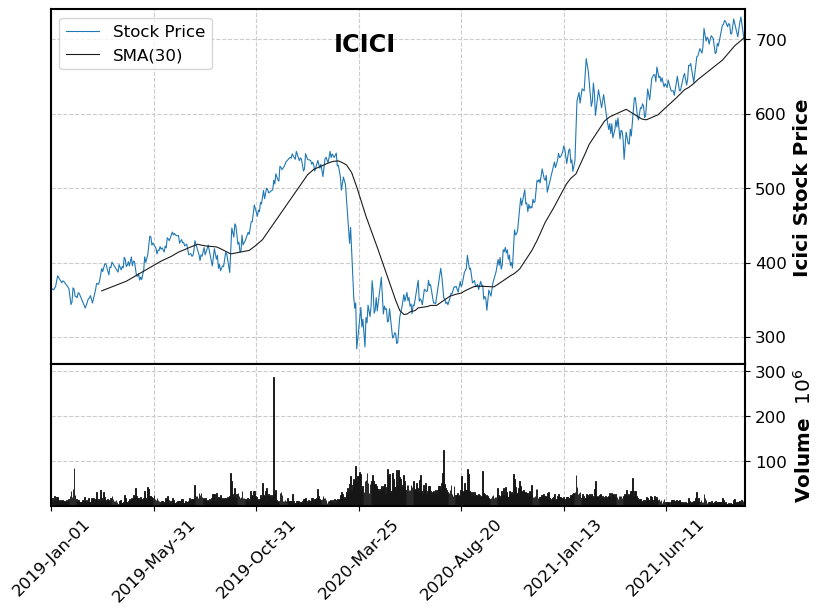

In [11]:
fig,ax =mpf.plot(df_icici ,volume=True,type='line',mav=50,tight_layout=True,style='classic',title='ICICI',returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
ax[0].set_ylabel('Icici Stock Price')
plt.show()

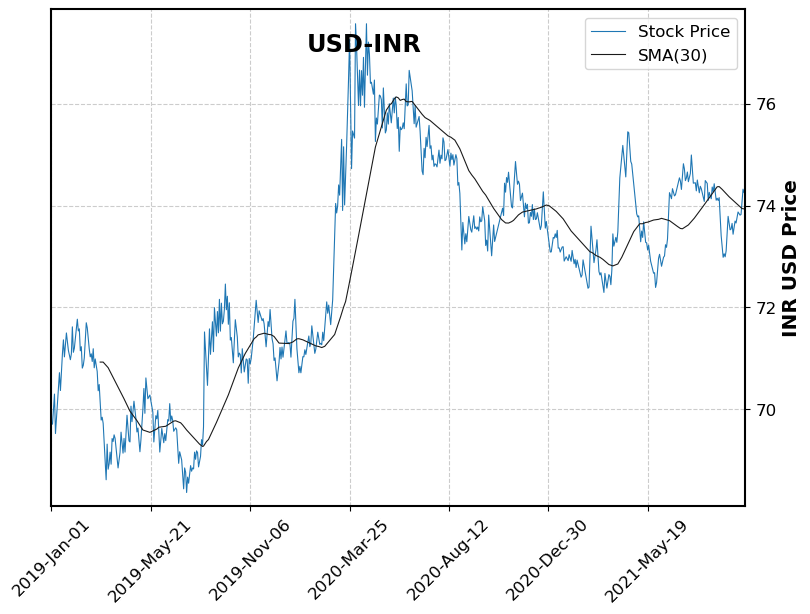

In [12]:
fig,ax =mpf.plot(df_inr ,type='line',mav=50,tight_layout=True,style='classic',title='USD-INR',returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
ax[0].set_ylabel('INR USD Price')
plt.show()

## Comparison between stocks

In [6]:
cog = pd.DataFrame(df_cognizant['Close'])
hdfc = pd.DataFrame(df_hdfc['Close'])
sbi = pd.DataFrame(df_sbi['Close'])
icici = pd.DataFrame(df_icici['Close'])
infosys = pd.DataFrame(df_infosys['Close'])
hcl = pd.DataFrame(df_hcl['Close'])
inr = pd.DataFrame(df_inr['Close'])

In [7]:
df = pd.merge(pd.merge(cog,hdfc,on='Date',suffixes=('_cog','_hdfc')),sbi,on='Date')
df.columns = ['Close_cog','Close_hdfc','Close_sbi']

In [8]:
df = pd.merge(df,icici,on='Date')
df.columns = ['Close_cog','Close_hdfc','Close_sbi','Close_icici']
df = pd.merge(df,infosys,on='Date')
df.columns = ['Close_cog','Close_hdfc','Close_sbi','Close_icici','Close_infosys']
df = pd.merge(df,hcl,on='Date')
df.columns = ['Close_cog','Close_hdfc','Close_sbi','Close_icici','Close_infosys','Close_hcl']
df = pd.merge(df,inr,on='Date')
df.columns = ['Cognizant','HDFC','SBI','ICICI','Infosys','HCL','INR']

In [9]:
plt.style.use(['science','nature','no-latex'])

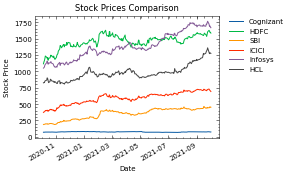

In [10]:
df2 = df.drop('INR',axis=1)
df2.plot()
plt.grid(False)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.title('Stock Prices Comparison')
plt.ylabel('Stock Price')
plt.savefig('Stock Price Comparison')
plt.show()

#### market_capitalization

In [11]:
# market capitalization
df_cognizant['market_cap'] = df_cognizant['Close']*df_cognizant['Volume']
df_hcl['market_cap'] = df_hcl['Close']*df_hcl['Volume']
df_hdfc['market_cap'] = df_hdfc['Close']*df_hdfc['Volume']
df_icici['market_cap'] = df_icici['Close']*df_icici['Volume']
df_infosys['market_cap'] = df_infosys['Close']*df_infosys['Volume']
df_sbi['market_cap'] = df_sbi['Close']*df_sbi['Volume']

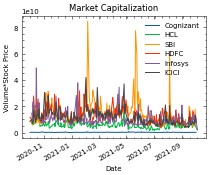

In [12]:
df_cognizant['market_cap'].loc['2020-10':].plot(label='Cognizant')
df_hcl['market_cap'].plot(label='HCL')
df_sbi['market_cap'].loc['2020-10':].plot(label='SBI')
df_hdfc['market_cap'].loc['2020-10':].plot(label='HDFC')
df_infosys['market_cap'].plot(label='Infosys')
df_icici['market_cap'].loc['2020-10':].plot(label='ICICI')
plt.title('Market Capitalization')
plt.ylabel('Volume*Stock Price')
plt.legend()
plt.savefig('Market Capitalization')
plt.show()

### Percentage increase in stock value

In [13]:
daily = df.pct_change() # daily change v[k]-v[k-1]

In [14]:
df_inr

,Open,High,Low,Close,Adj Close
Date,,,,,
2019-01-01,69.709999,69.730003,69.430000,69.709999,69.709999
2019-01-02,69.443001,70.233002,69.443001,69.709999,69.709999
2019-01-03,69.959999,70.510002,69.959999,69.959999,69.959999
2019-01-04,70.100502,70.130302,69.599998,70.300003,70.300003
2019-01-07,69.525002,69.919998,69.080002,69.525002,69.525002
...,...,...,...,...,...
2021-09-28,73.825302,74.288300,73.727997,73.825302,73.825302
2021-09-29,74.163300,74.564400,74.007004,74.163300,74.163300
2021-09-30,74.317299,74.355202,74.058800,74.321999,74.321999


(v[k]/r[k])/(v[k-1]/r[k-1])-1

In [15]:
# volatility, accounts for inflation as well
df_cognizant['returns'] = (df_cognizant['Close']/df_inr['Adj Close'])/(df_cognizant['Close'].shift(1)/df_inr['Adj Close'].shift(1))-1
df_hcl['returns'] = (df_hcl['Close']/df_inr['Adj Close'])/(df_hcl['Close'].shift(1)/df_inr['Adj Close'].shift(1))-1
df_hdfc['returns'] = (df_hdfc['Close']/df_inr['Adj Close'])/(df_hdfc['Close'].shift(1)/df_inr['Adj Close'].shift(1))-1
df_icici['returns'] = (df_icici['Close']/df_inr['Adj Close'])/(df_icici['Close'].shift(1)/df_inr['Adj Close'].shift(1))-1
df_infosys['returns'] = (df_infosys['Close']/df_inr['Adj Close'])/(df_infosys['Close'].shift(1)/df_inr['Adj Close'].shift(1))-1
df_sbi['returns'] = (df_sbi['Close']/df_inr['Adj Close'])/(df_sbi['Close'].shift(1)/df_inr['Adj Close'].shift(1))-1

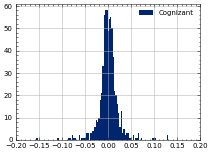

In [16]:
df_cognizant['returns'].hist(bins = 100, label = 'Cognizant', alpha = 1,color='#01256F')
plt.legend()
plt.xlim(-0.2,0.2)
plt.savefig('Cognizant_returns')

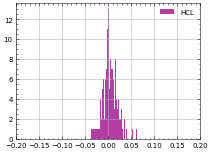

In [17]:
df_hcl['returns'].hist(bins = 100, label = 'HCL', alpha = 1,color='#b43ca4')
plt.legend()
plt.xlim(-0.2,0.2)
plt.savefig('hcl_returns')

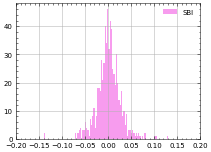

In [18]:
df_sbi['returns'].hist(bins = 100, label = 'SBI', alpha = 1,color='#f79cee')
plt.legend()
plt.xlim(-0.2,0.2)
plt.savefig('sbi_returns')

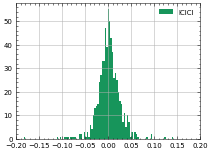

In [19]:
df_icici['returns'].hist(bins = 100, label = 'ICICI', alpha = 1,color='#17955b')
plt.legend()
plt.xlim(-0.2,0.2)
plt.savefig('icici_returns')

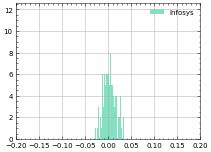

In [20]:
df_infosys['returns'].hist(bins = 100, label = 'Infosys', alpha = 1,color='#83e0c1')
plt.legend()
plt.xlim(-0.2,0.2)
plt.savefig('infosys_returns')

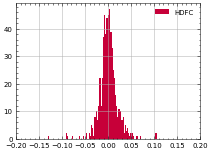

In [21]:
df_hdfc['returns'].hist(bins = 100, label = 'HDFC', alpha = 1,color='#C70039')
plt.legend()
plt.xlim(-0.2,0.2)
plt.savefig('hdfc_returns')

In [22]:
print('cognizant',df_cognizant['returns'].mean())
print('hcl',df_hcl['returns'].mean())
print('hdfc',df_hdfc['returns'].mean())
print('sbi',df_sbi['returns'].mean())
print('icici',df_icici['returns'].mean())
print('infosys',df_infosys['returns'].mean())

cognizant 0.0004756089653231044
hcl 0.001836503584923399
hdfc 0.0006150277239419385
sbi 0.00099525413730868
icici 0.0011023990744476056
infosys 0.001905673772731089


In [23]:
print('cognizant',df_cognizant['returns'].mean()*1000)
print('hcl',df_hcl['returns'].mean()*1000)
print('hdfc',df_hdfc['returns'].mean()*1000)
print('sbi',df_sbi['returns'].mean()*1000)
print('icici',df_icici['returns'].mean()*1000)
print('infosys',df_infosys['returns'].mean()*1000)

cognizant 0.4756089653231044
hcl 1.836503584923399
hdfc 0.6150277239419385
sbi 0.99525413730868
icici 1.1023990744476055
infosys 1.905673772731089


In [24]:
print('cognizant',df_cognizant['returns'].std())
print('hcl',df_hcl['returns'].std())
print('hdfc',df_hdfc['returns'].std())
print('sbi',df_sbi['returns'].std())
print('icici',df_icici['returns'].std())
print('infosys',df_infosys['returns'].std())

cognizant 0.021741171533710423
hcl 0.017250313960387557
hdfc 0.019889473841460246
sbi 0.025591563764709856
icici 0.02564093426970809
infosys 0.013870622955687993


- Infosys stock the best considering high means, and less standard deviation. Of course subject to change with persons

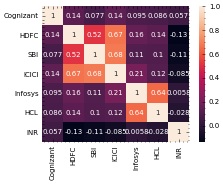

In [25]:
mat = daily.corr()
sns.heatmap(mat,annot=True)
# plt.savefig('StockCorrelation')
plt.show()

## Infosys - Predictions

## Time Series Method

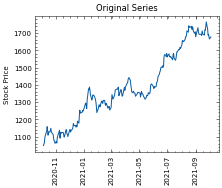

In [26]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Import data
df = pd.DataFrame(df_infosys['Close'])


plt.plot(df.Close); 
plt.title('Original Series')
plt.xticks(rotation=90)
plt.ylabel('Stock Price')
plt.savefig('Original Series')
plt.show()

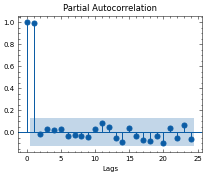

In [27]:
plot_pacf(df.Close)
plt.xlabel('Lags')
plt.savefig('PACF d0')
plt.show()

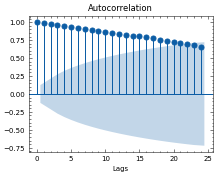

In [28]:
plot_acf(df.Close)
plt.xlabel('Lags')
plt.savefig('ACF d0')
plt.show()

In [29]:
from pmdarima.arima.utils import ndiffs
y = df.Close

## Adf Test
print(ndiffs(y, test='adf'))  # 1

# KPSS test
print(ndiffs(y, test='kpss'))  # 1

# PP test:
print(ndiffs(y, test='pp'))  # 1

1
1
1


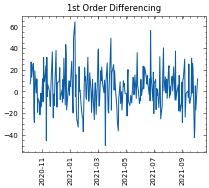

In [30]:
plt.plot(df.Close.diff()); 
plt.title('1st Order Differencing')
plt.xticks(rotation=90)
plt.savefig("1storderdifferencing")
plt.show()

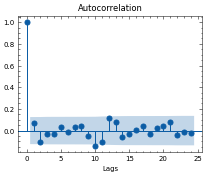

In [31]:
plot_acf(df.Close.diff().dropna())
plt.xlabel('Lags')
plt.savefig('ACF d1')
plt.show()

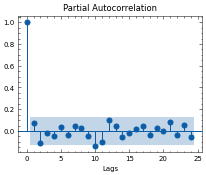

In [32]:
plot_pacf(df.Close.diff().dropna())
plt.xlabel('Lags')
plt.savefig("PACF D1")
plt.show()

## Train

In [33]:
training_data_len = int(np.ceil( len(df) * .80 ))

In [34]:
train = df.iloc[:training_data_len]
test = df.iloc[training_data_len:]

In [38]:
from statsmodels.tsa.arima_model import ARIMA

# 0,1,0 ARIMA Model
model = ARIMA(train.Close, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  198
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -857.310
Method:                           css   S.D. of innovations             18.374
Date:                Sun, 12 Dec 2021   AIC                           1718.621
Time:                        10:33:01   BIC                           1725.197
Sample:                             1   HQIC                          1721.283
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7361      1.306      2.095      0.036       0.177       5.295


C:\Users\VIGNESH S\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\VIGNESH S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated f

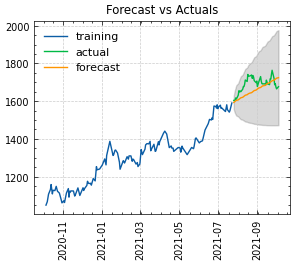

In [46]:
# Forecast
fitted = model_fit
fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure()
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
# plt.savefig('ARIMA predictions')
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error

In [42]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [43]:
train_ar = train['Close'].values
test_ar = test['Close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


C:\Users\VIGNESH S\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 310.346
Symmetric mean absolute percentage error: 2.650


In [58]:
plt.style.use(['ieee','no-latex','science'])

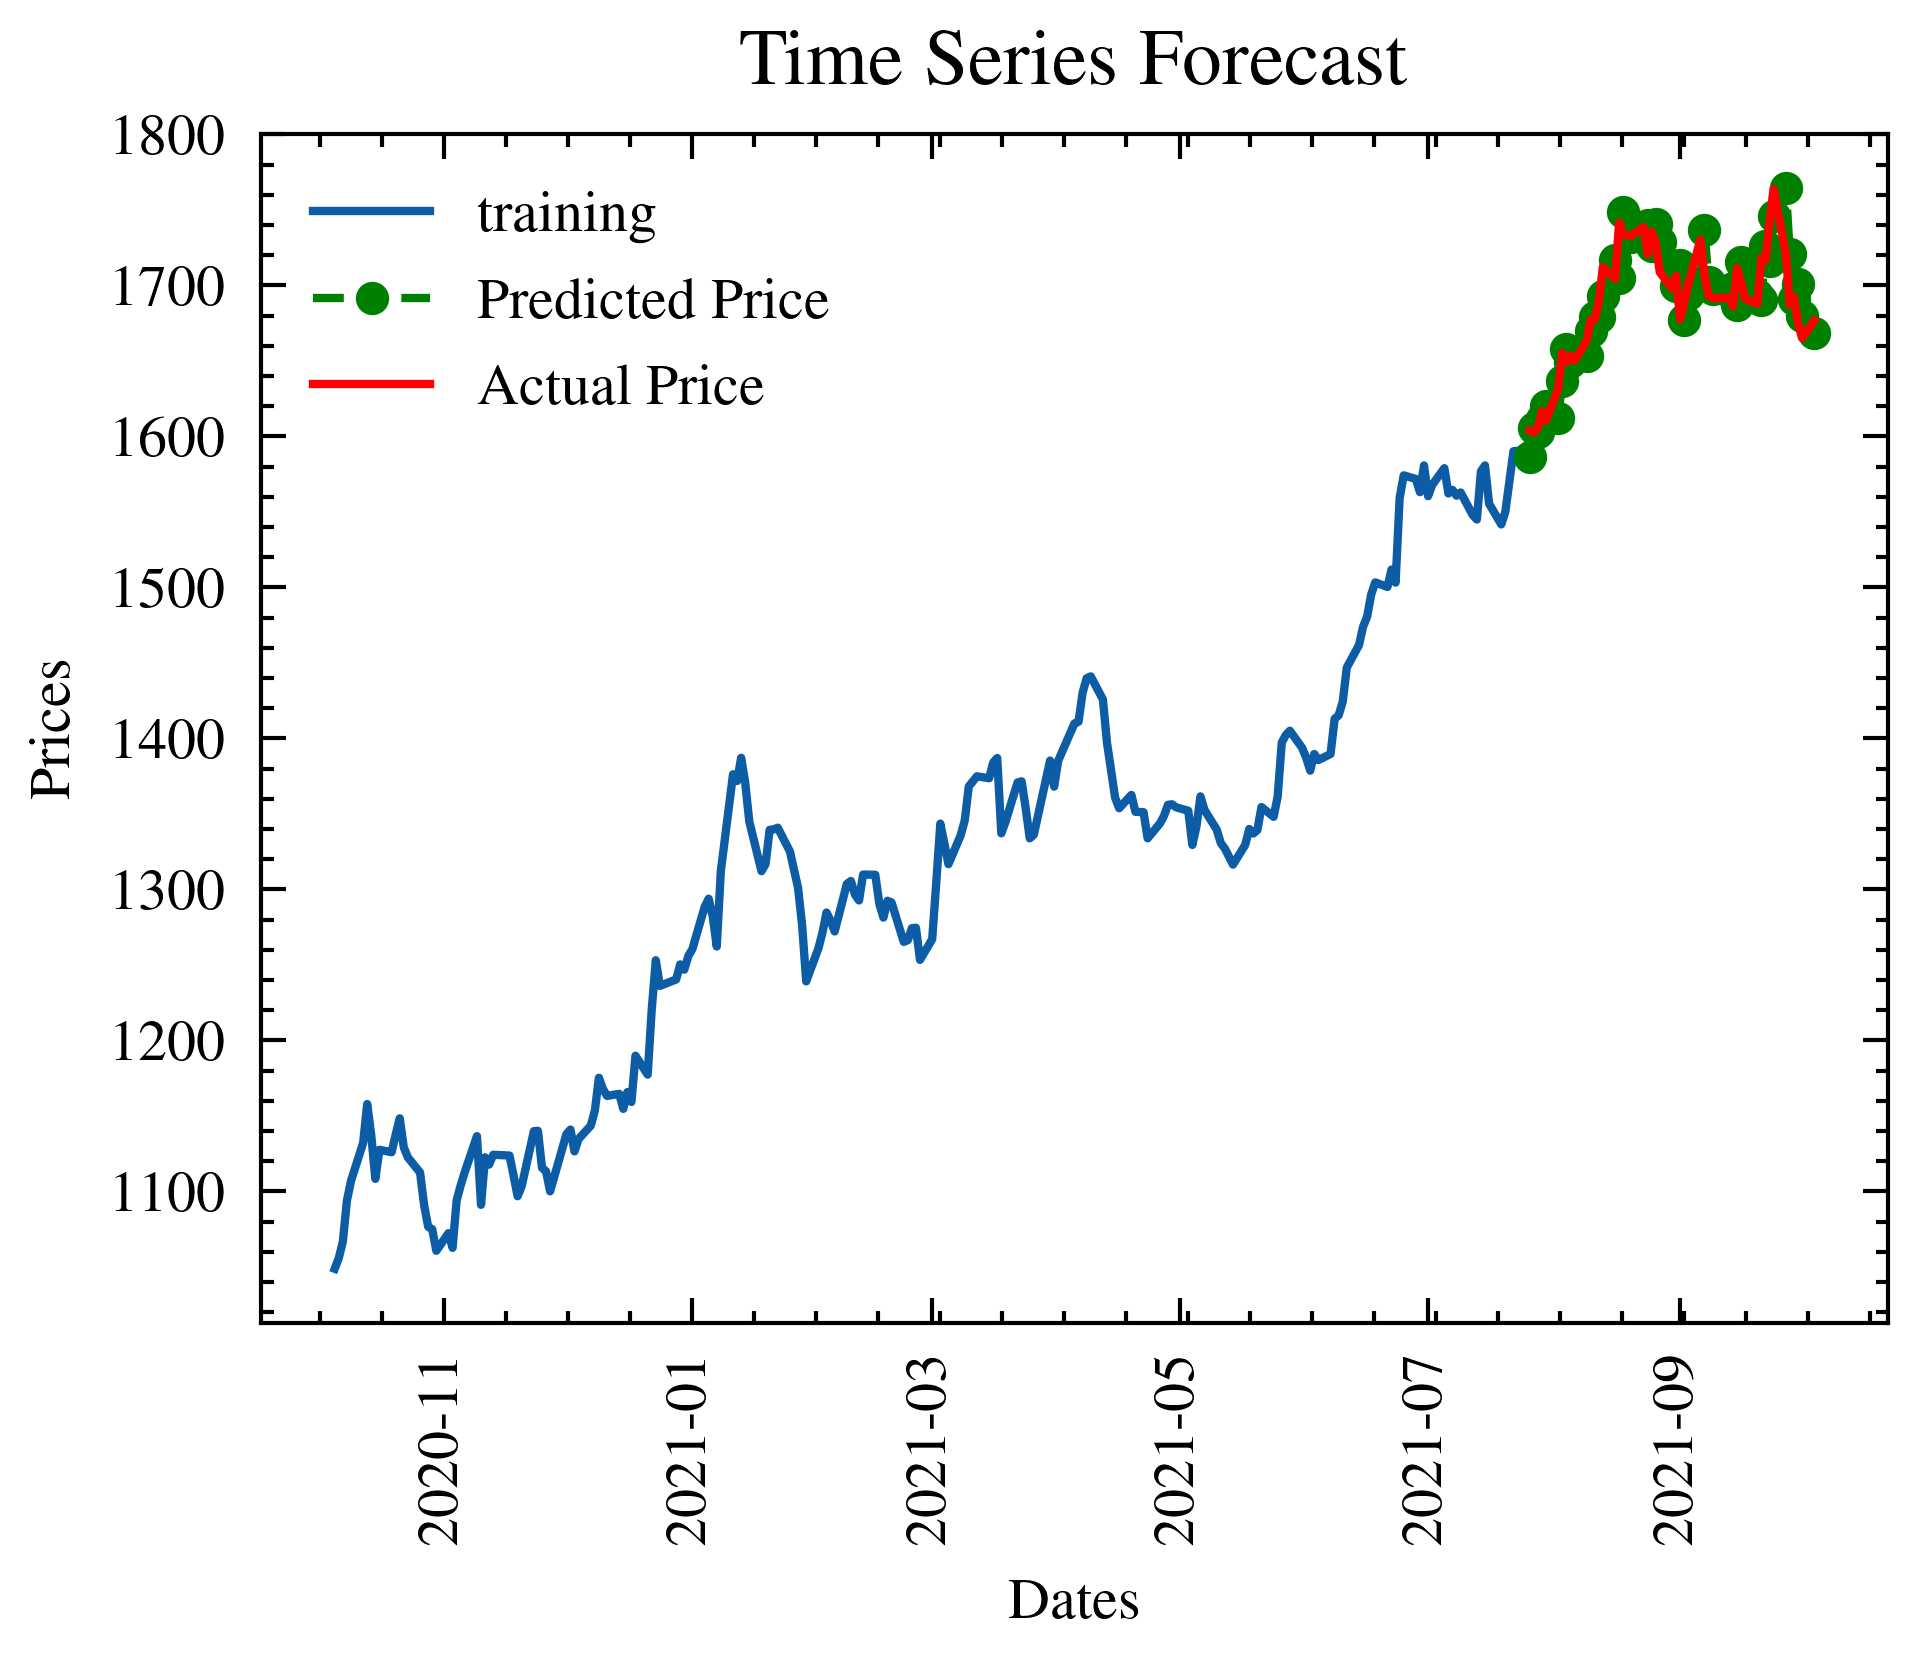

In [63]:
plt.plot(train, label='training')
plt.plot(test.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test.index, test['Close'], color='red', label='Actual Price')
plt.title('Time Series Forecast')
plt.xlabel('Dates')
plt.xticks(rotation=90)
plt.ylabel('Prices')
plt.legend()
# plt.savefig('ARIMA')
plt.show()

## LSTM 

In [47]:
# Create a new dataframe with only the 'Close column 
data = df_infosys.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

In [48]:
training_data_len

199

In [49]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [50]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        pass
#         print(x_train)
#         print(y_train)
#         print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Using TensorFlow backend.


Epoch 1/1
139/139 [==============================] - 5s 33ms/step - loss: 0.0479: 1s - loss: 0 - ETA: 0s - l


In [52]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

30.359782485240245

In [53]:
plt.style.use(['science','no-latex'])

In [54]:
train

,Close
Date,
2020-10-05,1048.699951
2020-10-06,1055.750000
2020-10-07,1066.550049
2020-10-08,1093.699951
2020-10-09,1106.800049
...,...
2021-07-16,1555.449951
2021-07-19,1541.699951
2021-07-20,1550.050049


In [ ]:
valid

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\VIGNESH S\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-0b02ceba8652>", line 1, in <module>
    valid
NameError: name 'valid' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\VIGNESH S\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\VIGNESH S\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\VIGNESH S\anaconda3\lib\site-packages\IPython\co

C:\Users\VIGNESH S\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ERROR! Session/line number was not unique in database. History logging moved to new session 513


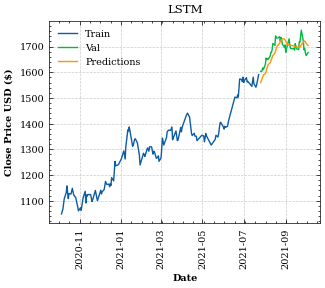

In [55]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.title('LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.xticks(rotation=90)
plt.savefig('LSTM Model')
plt.show()